In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100,1)


In [2]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.10619096],
       [2.9186019 ]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.10619096],
       [9.94339475]])

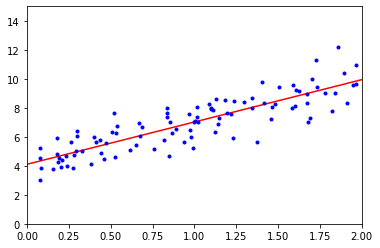

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.10619096],
       [9.94339475]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10619096],
       [2.9186019 ]])

In [8]:
#batch gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[4.10619096],
       [2.9186019 ]])

In [10]:
#stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

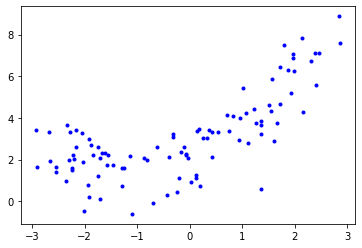

In [11]:
#polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([1.65562877]), array([1.65562877, 2.74110663]))

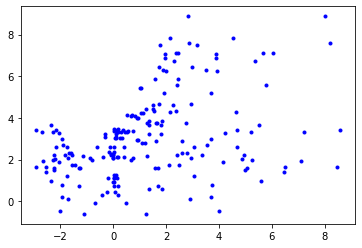

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# lin_reg.intercept_, lin_reg.coef_
plt.plot(X_poly, y, "b.")

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    

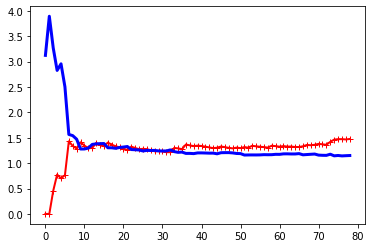

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [16]:
#ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.55016537]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.5018016])

In [18]:
#lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.49127251])

In [19]:
#elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio =  0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.4965286])

Should always go for some regularization
Ridge is good default
Use Lasso or Elastic Net if only few features are going to be relevant


In [20]:
#early stopping
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant",eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if iris-virginica, else 0

C:\Users\neel\AppData\Local\Temp\ipykernel_21972\2855872646.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) #1 if iris-virginica, else 0


In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

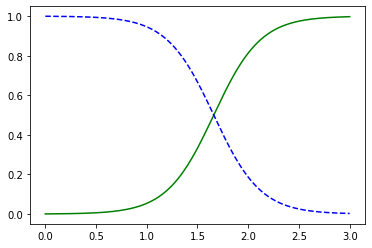

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not iris-virginica")

In [24]:
zR = np.random.rand(2,4)
zN = np.random.rand(4)

zMult = zR * zN
zDot = zR.dot(zN)

print(zMult)
print("-------------")
print(zDot)

[[0.44265233 0.04413721 0.15065238 0.30303548]
 [0.36521506 0.06775786 0.12624171 0.04545784]]
-------------
[0.9404774  0.60467248]


In [166]:
# Implement Batch Gradient Descent with early stopping for Softmax Regression
# (without using Scikit-Learn).


def batchGradientDescent(X, y):
    theta = np.random.randn(3,1)
    m = y.size
    transposeX = X.T
    n_iterations = 1000
    eta = 0.1
    for _ in range(n_iterations):
        gradient = 2/m * transposeX.dot(X.dot(theta) - y)
        theta = theta - eta * gradient
    
    return theta

# theta = batchGradientDescent(np.random.rand(2,2), np.ones(2))
# print(theta)

In [181]:
X = 3 * np.random.rand(100,1)
X1 = 2 * np.random.rand(100,1)
y = 27 + (2 * X )+ (2 * X1) + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X, X1]
batchGradientDescent(X_b, y)

array([[26.69937256],
       [ 2.20136276],
       [ 2.09665249]])